<a href="https://colab.research.google.com/github/DanielSantosSouza/DanielSantosSouza/blob/main/Panorama_do_COVID_19_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Mundo

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Mundo, irei realizar uma análise sobre os dados públicos da doença a fim de responder as seguintes hipóteses.



*   H1: Os países com a maior quantidade de casos, são os países com menor PIB;
*   H2: Os países com a maior quantidade de casos, são os países em que há uma maior parcela da população vivendo em extrema pobreza;
*   H3: Os países com maior quantidade de mortos por COVID-19 são os países com uma maior expectativa de vida;
*   H4: Os países com maior quantidade de mortos por COVID-19 possuem uma menor quantidade de leitos disponíveis;
*   H5: Os países com maior quantidade de mortos por COVID-19 são os países que menos vacinam.


# Obtenção dos Dados

Os dados foram obtidos [aqui](https://github.com/owid/covid-19-data/tree/master/public/data). Trata-se de um repositório com os dados do COVID-19 no mundo e nele, podemos obter informações relacionadas a casos confirmados, mortalidade, hospitalizações e admissões em Unidades de Terapia Intensiva (UTI), testes e positividade e diversas outras informações.
Segundo o repositório, os dados possuem a seguinte origem:

* Casos confirmados e de morte: são proveninentes do COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) da Universidade Johns Hopkins (JHU);

* Hospitalizações e admissões em unidades de terapia intensiva (UTI): São provenientes da European Centre for Disease Prevention and Control (ECDC) para um número seleto de países europeus e fontes governamentais para o Reino Unido, Estados Unidos, Canadá, Israel, Argélia, Suíça, Sérvia, Malásia;

* Teste para COVID-19: esses dados são coletados pela equipe Our World in Data a partir de relatórios oficiais;

* Vacinações contra COVID-19: esses dados são coletados pela equipe Our World in Data a partir de relatórios oficiais.

* Outras variáveis: São coletados de uma variedade de fontes (Nações Unidas, Banco Mundial, Carga Global de Doenças, Escola de Governo Blavatnik, etc.

In [348]:
# instalando bibliotecas necessárias
!pip install bar_chart_race -q

# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr
from tabulate import tabulate

# importando o dataset COVID-19 para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# formatação dos dados apresentados
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress = True)


# Análise dos Dados

##DataFrame

Nesta etapa, iremos criar analisar e entender como os dados estão estruturados. 




**Dicionário das variáveis**

Nesta etapa, temos um dicionário com todos os atributos do dataset que está sendo analisado. 

* `iso_code`: Código de três letras para identificação do país;
* `continent`: Continente de localização geográfica;
* `location`: Localização geográfica;
* `date`: Data de observação;
* `total_cases`: Total de casos confirmados de COVID-19;
* `new_cases`: Novos casos confirmados de COVID-19;
* `new_cases_smoothed`: Novos casos confirmados de COVID-19 (Suavizado 7 dias);
* `total_deaths`: Total de mortes atribuidas a COVID-19;
* `new_deaths`: Novas mortes atribuidas a COVID-19;
* `new_deaths_smoothed`: Novas mortes atribuidas a COVID-19 (Suavizado 7 dias);
* `new_cases_per_million`: Novos casos confirmados atribuidos ao COVID-19 por 1.000.000 de pessoas;
* `new_cases_smoothed_per_million`: Novos casos confirmados atribuidos ao COVID-19 por 1.000.000 de pessoas;
* `total_deaths_per_million`: Total de morte atribuidas ao COVID-19 por 1.000.000 de pessoas;
* `new_deaths_per_million`: Novas mortes atribuidas ao COVID-19 por 1.000.000 de pessoas;
* `new_deaths_smoothed_per_million`: Novas mortes atribuidas ao COVID-19 por 1.000.000 de pessoas (Suavizado 7 dias);
* `reproduction_rate`: Estimativa da taxa de reprodução do COVID-19;
* `icu_patients`: Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um determiando dia;
* `icu_patients_per_million`: Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um determiando dia por 1.000.000 de pessoas;
* `hosp_patients`: Número de pacientes COVID-19 no hospital em um determinado dia;
* `hosp_patients_per_million`: Número de pacientes COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas;
* `weekly_icu_admissions`: Número de pacientes de COVID-19 recèm -admitidos em unidades de terapia intensiva (UTI) em uma determinada semana;
* `weekly_icu_admissions_per_million`: Número de pacientes de COVID-19 recèm -admitidos em unidades de terapia intensiva (UTI) em uma determinada semana por 1.000.000 de pessoas;
* `weekly_hosp_admissions`: Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana;
* `weekly_hosp_admissions_per_million`: Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas;
* `new_tests`: Novos testes para COVID-19;
* `total_tests`: Total de testes para COVID-19;
* `total_tests_per_thousand`: Total de testes para COVID-19 por 1.000 pessoas;
* `new_tests_per_thousand`: Novos testes para COVID-19 por 1.000 pessoas;
* `new_tests_smoothed`: Novos testes para COVID-19 (Suavizado por 7 dias);
* `new_tests_smoothed_per_thousand`: Novos testes para COVID-19 (Suavizado por 7 dias) por 1.000 pessoas;
* `positive_rate`: A parcela de testes de COVID-19 que são positivos, dada como uma média contínua de 7 dias;
* `tests_per_case`: Casos confirmados pela quantidade de testes, dada como uma média contínua de 7 dias;
* `tests_units`: Unidades usadas pelo local para relatar seus dados de teste;
* `total_vaccinations`: Total de doses de vacinas aplicadas;
* `people_vaccinated`: Total de pessoas que receberam pelo menos uma dose da vacina;
* `people_fully_vaccinated`: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação;
* `total_booters`: Número total de doses de reforço da vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação);
* `new_vaccinations`: Novas doses de vacinação COVID-19 administradas (calculadas apenas para dias consecutivos);
* `new_vaccinations_smoothed`: Novas doses de vacinação COVID-19 administradas (Suavizado por 7 dias);
* `total_vaccinations_per_hundred`: Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total;
* `people_vaccinated_per_hundred`: Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total;
* `people_fully_vaccinated_per_hundred`: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total;
* `total_booters_per_hundred`: Número total de doses de reforço da vacinação COVID-19 administradas por 100 pessoas na população total;
* `new_vaccinations_smoothed_per_million`: Novas doses de vacinação COVID-19 administradas (Suavizado por 7 dias) por 1.000.000 de pessoas na população total;
* `new_people_vaccinated_smoothed`: Número diário de pessoas que recebem sua primeira dose de vacina (Suavizado por 7 dias);
* `new_people_vaccinated_smoothed_per_hundred`: Número diário de pessoas recebendo sua primeira dose de vacina (Suavizado por 7 dias) por 100 pessoas na população total;
* `stringency_index`: Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais estrita);
* `population`: População (últimos valores disponíveis);
* `population_density`: Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, ano mais recente disponível;
* `median_age`: Idade média da população, projeção da ONU para 2020;
* `aged_65_older`: Parcela da população com 65 anos ou mais, ano mais recente disponível;
* `aged_70_older`: Parcela da população com 70 anos ou mais em 2015;
* `gdp_per_capita`: Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível;
* `extreme_poverty`: Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010;
* `cardiovac_death_rate`: Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas);
* `diabetes_prevalence`: Prevalência de diabetes (% da população de 20 a 79 anos) em 2017;
* `female_smokers`: Parcela de mulheres que fumam, ano mais recente disponível;
* `Male_smokers`: Parcela de homens que fumam, ano mais recente disponível;
* `handwashing_facilities`: Parcela da população com instalações básicas de lavagem das mãos no local, ano mais recente disponível;
* `hospital_beds_per_thousand`: Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010;
* `life_expectancy`: Expectativa de vida ao nascer em 2019;
* `human_development_index`: Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano - uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019;
* `excess_mortality_cumulative_absolute`: Diferença cumulativa entre o número relatado de mortes desde 1 de janeiro de 2020 e o número projetado de mortes para o mesmo período com base nos anos anteriores.;
* `excess_mortality_cumulative`: Diferença percentual entre o número cumulativo de mortes desde 1º de janeiro de 2020 e as mortes projetadas cumulativas para o mesmo período com base nos anos anteriores;
* `excess_mortality`: Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período com base nos anos anteriores. Para maiores informações;
* `excess_mortality_cumulative_per_million`: Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base nos anos anteriores, por milhão de pessoas;

Antes de iniciar, vamos verificar quantas entradas e atributos o dataset possui. Além disso, verificar o tipo de dados dos atributos.

In [349]:
# visualizando a quantidade de variáveis e entradas
print(f'Quantidade de entradas: {df.shape[1]}')
print(f'Quantidade de atributos: {df.shape[0]}')

Quantidade de entradas: 67
Quantidade de atributos: 149028


In [350]:
# verificando o tipo de dados de cada variável
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Iremos agora verificar a cinco primeiras entradas do dataset.

In [351]:
# visualiando as cinco primeiras linhas do DataFrame
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.00,5.00,nan,nan,nan,nan,0.13,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.33,39835428.00,54.42,18.60,2.58,1.34,1803.99,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan,nan,nan,nan
1,AFG,Asia,Afghanistan,2020-02-25,5.00,0.00,nan,nan,nan,nan,0.13,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.33,39835428.00,54.42,18.60,2.58,1.34,1803.99,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan,nan,nan,nan
2,AFG,Asia,Afghanistan,2020-02-26,5.00,0.00,nan,nan,nan,nan,0.13,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.33,39835428.00,54.42,18.60,2.58,1.34,1803.99,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan,nan,nan,nan
3,AFG,Asia,Afghanistan,2020-02-27,5.00,0.00,nan,nan,nan,nan,0.13,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.33,39835428.00,54.42,18.60,2.58,1.34,1803.99,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan,nan,nan,nan
4,AFG,Asia,Afghanistan,2020-02-28,5.00,0.00,nan,nan,nan,nan,0.13,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.33,39835428.00,54.42,18.60,2.58,1.34,1803.99,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan,nan,nan,nan


##Tratamento dos dados

Após verificarmos os tipos de dados de cada atributo e as 5 primeiras entradas do nosso dataset, convém alterarmos o tipo de dado da variável `date` de objeto para datetime.

In [352]:
# convertendo a coluna date de object para datetime
df['date'] = pd.to_datetime(df['date'])

print(df['date'].dtypes)

datetime64[ns]


Vamos agora verificar, se há dados nulos no dataset.

In [353]:
# verificando a quantidade de dados nulos em cada variável
((df.isnull() / df.shape[0]).sum() * 100).sort_values(ascending = False)

weekly_icu_admissions                     99.10
weekly_icu_admissions_per_million         99.10
weekly_hosp_admissions_per_million        98.50
weekly_hosp_admissions                    98.50
excess_mortality_cumulative_per_million   96.56
                                           ... 
total_cases                                1.75
population                                 0.67
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

Verificamos que os atributos `weekly_icu_admissions`, `weekly_icu_admissions_per_million`, `weekly_hosp_admissions_per_million`, `weekly_hosp_admissions`, `excess_mortality_cumulative_per_million` apresentam mais de 95% dos dados nulos. Optaremos por eliminar essas variáveis, tendo em vista que não irão interferir em nossa análise.



In [354]:
# eliminando as colunas cujas entradas estão vazias
df.drop(columns = ['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'weekly_hosp_admissions', 'excess_mortality_cumulative_per_million'], inplace = True)

Iremos agora verificar as principais medidas estatisticas para os atributos presentes no dataset.

In [355]:
# visualizando as principais medidas estatísticas
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
count,146418.00,146412.00,145267.00,129414.00,129610.00,145267.00,145734.00,145728.00,144588.00,128743.00,128939.00,144588.00,112010.00,17322.00,17322.00,19775.00,19775.00,59360.00,59523.00,59523.00,59360.00,72331.00,71647.00,67517.00,66855.00,37381.00,35950.00,33132.00,10701.00,30975.00,68120.00,37381.00,35950.00,33132.00,10701.00,68120.00,66986.00,66986.00,117268.00,148027.00,132670.00,123819.00,122473.00,123154.00,124208.00,82009.00,122840.00,129131.00,95153.00,93781.00,61513.00,110992.00,139082.00,122315.00,5125.00,5125.00,5125.00
mean,2051519.90,7887.95,7889.19,51285.78,172.02,152.90,22307.72,96.40,96.22,441.48,1.63,1.45,1.00,890.64,22.85,4067.88,160.82,60142.63,13564279.32,578.95,2.71,78686.63,2.58,0.09,160.66,130716353.50,69460220.26,50461648.21,5965497.76,1121078.59,521681.42,58.76,32.87,26.75,4.40,3415.71,262106.72,0.17,55.46,148726371.90,465.50,30.59,8.78,5.54,19699.73,13.53,259.75,8.18,10.59,32.76,50.83,3.03,73.60,0.73,33933.53,8.99,16.21
std,12177752.94,43063.30,42408.92,270068.33,838.60,775.05,36479.00,298.46,214.96,703.59,5.07,3.49,0.34,2781.07,24.88,11129.32,213.71,200945.70,54724172.73,1413.77,7.38,325659.70,6.14,0.09,829.45,601328269.47,326019547.68,249773889.47,26088123.42,4226130.93,2834655.34,54.66,27.29,25.44,8.77,4047.79,2396269.85,0.27,20.61,708715980.01,2150.48,9.10,6.15,4.19,20673.49,20.00,119.79,4.45,10.50,13.52,31.82,2.45,7.49,0.15,95909.38,16.68,31.28
min,1.00,-74347.00,-6223.00,1.00,-1918.00,-232.14,0.00,-3125.83,-272.97,0.00,-75.91,-10.84,-0.03,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.39,-31959.40,-28.45,-95.92
25%,1468.00,1.00,5.57,65.00,0.00,0.00,482.87,0.02,1.39,15.04,0.00,0.00,0.83,27.00,4.20,114.00,23.77,2267.00,292958.50,26.72,0.21,2391.00,0.23,0.02,8.10,460159.00,315860.25,198686.00,132.00,6665.50,1103.00,8.31,6.08,3.31,0.00,656.00,543.00,0.03,41.20,1273428.00,36.25,22.20,3.51,2.06,4466.51,0.60,168.71,5.31,1.90,21.60,19.35,1.30,69.50,0.60,-98.40,-0.87,-0.58
50%,19318.00,67.00,87.71,647.00,2.00,1.29,3864.72,9.66,15.26,100.93,0.12,0.16,1.00,133.00,13.57,576.00,73.65,8384.00,1489264.00,134.86,0.80,8944.00,0.87,0.05,19.80,3506354.00,2252224.50,1606876.00,68384.00,40217.00,9142.50,43.16,28.18,18.56,0.21,2264.00,4548.00,0.09,56.02,8715494.00,85.13,29.90,6.61,3.92,12951.84,2.20,242.65,7.17,6.30,31.40,49.84,2.40,75.05,0.74,2609.30,5.51,7.14
75%,244795.50,899.00,949.79,6275.00,19.00,15.00,28806.35,83.41,95.92,593.43,1.28,1.30,1.17,536.00,34.59,2613.50,207.05,32779.50,6315534.50,533.67,2.50,36142.50,2.55,0.12,58.90,21404200.00,13182113.75,9128820.25,1482578.00,265141.50,63918.50,102.51,57.47,48.07,4.44,4926.00,31287.25,0.23,71.30,33933611.00,212.87,39.10,14

É perceptível a presença de outliers. Iremos visualiazar os dados nos quais a entrada `continent` é nula.

In [356]:
# visualizando para quais entradas da variável loocation, a variável continent é nula
df.loc[df['continent'].isnull()]['location'].value_counts()

North America          700
High income            700
Asia                   700
Upper middle income    700
Lower middle income    700
World                  700
Europe                 699
European Union         699
Oceania                697
International          684
Africa                 678
South America          669
Low income             668
Name: location, dtype: int64

Verificamos que correspondem a informações agrupadas, como por exemplo, de continentes. Como o objetivo é obter informações referentes a países, iremos eliminar esses dados do nosso dataset.

In [357]:
# Eliminando as entradas para quais a variável continent é nula.
df.drop(df.loc[df['location'] == 'World'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Asia'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Lower middle income'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'North America'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'High income'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Upper middle income'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Europe'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'European Union'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Oceania'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'International'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Africa'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'South America'].index, axis = 0, inplace = True)
df.drop(df.loc[df['location'] == 'Low income'].index, axis = 0, inplace = True)


##Análise Exploratória dos Dados

Feito isso, podemos agora responder as hipóteses.

###H1: Os países com a maior quantidade de casos, são os países com menor PIB

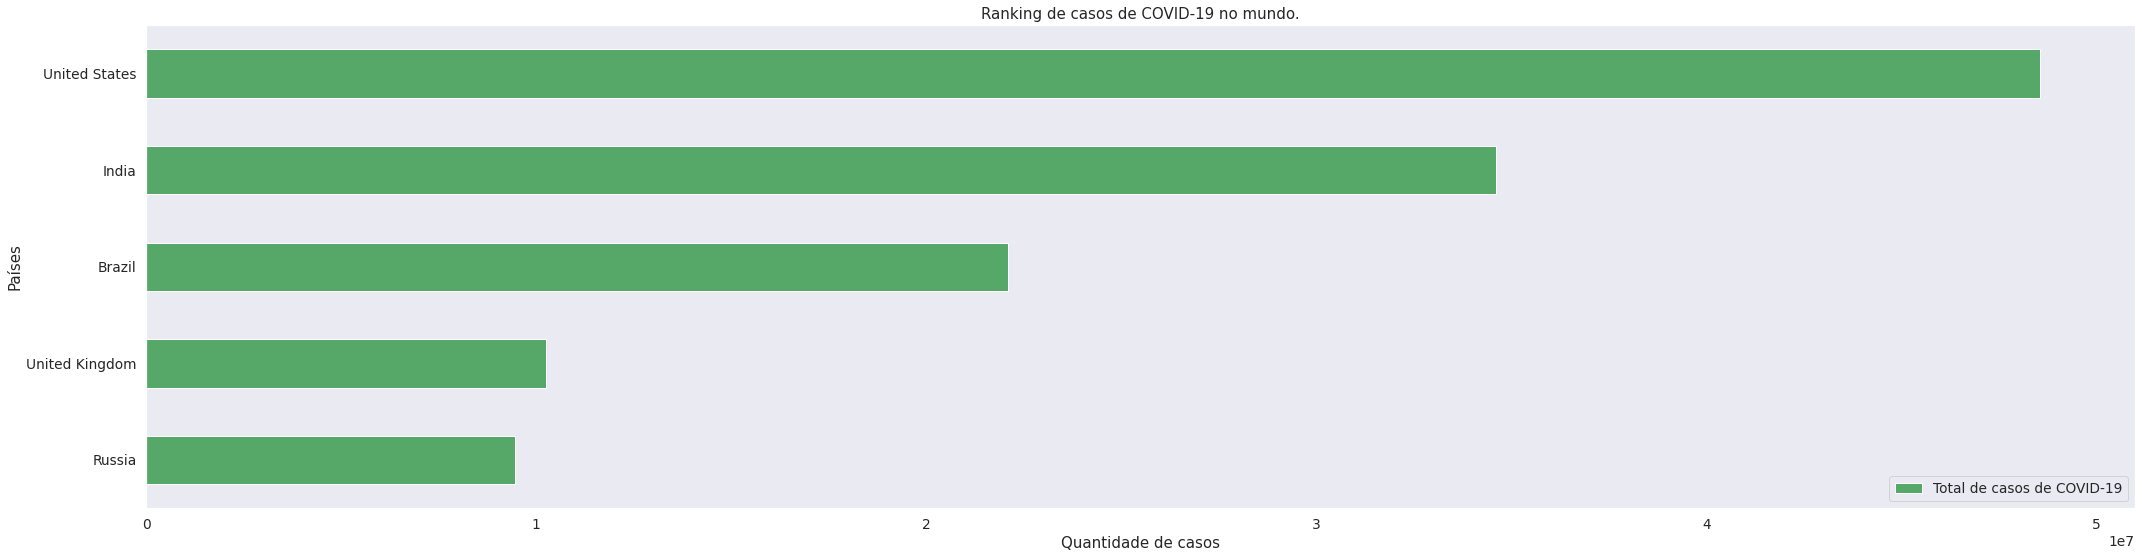

In [358]:
# listando os países com maior quantidade de casos de COVID-19
df_bar = df.loc[df['date'] == '2021-11-30', ['location', 'total_cases']].sort_values(by = 'total_cases', ascending = False)[0:5]

# reordenando o DataFrame
df_bar.sort_values(by = 'total_cases', ascending = True, inplace = True)

# plotando o gráfico de barras
fig, ax = plt.subplots(figsize = (30, 8))

df_bar.plot(x = 'location', y = 'total_cases', kind='barh', ax = ax, color = 'g', label = 'Total de casos de COVID-19')
ax.set_xticks(list(df_bar['total_cases']), minor = True)
ax.set_title('Ranking de casos de COVID-19 no mundo.')
ax.set_xlabel('Quantidade de casos')
ax.set_ylabel('Países')

plt.tight_layout()

In [359]:
# listando os países com maior quantidade de casos de COVID-19
df_pib = df.loc[df['date'] == '2021-11-30', ['location', 'gdp_per_capita']].sort_values(by = 'gdp_per_capita', ascending = False).reset_index()

#eliminando a coluna index
df_pib.drop(columns = ['index'], inplace = True)

# selecionando os países com maior quantidade de casos de COVID-19
df_pib.loc[((df_pib['location'] == 'United States') | (df_pib['location'] == 'India') | (df_pib['location'] == 'Brazil') | (df_pib['location'] == 'United Kingdom') | (df_pib['location'] == 'Russia'))]

,location,gdp_per_capita
12,United States,54225.45
27,United Kingdom,39753.24
54,Russia,24765.95
84,Brazil,14103.45
125,India,6426.67


Verificamos que os países com maior quantidade de casos de COVID-19 não estão entre o TOP 10 maiores PIB do mundo. Todavia, entre os cinco países com maior quantidade de casos, há países que estão entre os quinze maiores e países que possuem um PIB como é o caso da India. Portanto, concluímos que não há nenhuma relação entre a quantidade de casos de COVID-19 e o PIB.

###H2: Os países com a maior quantidade de casos, são os países mais pobres;

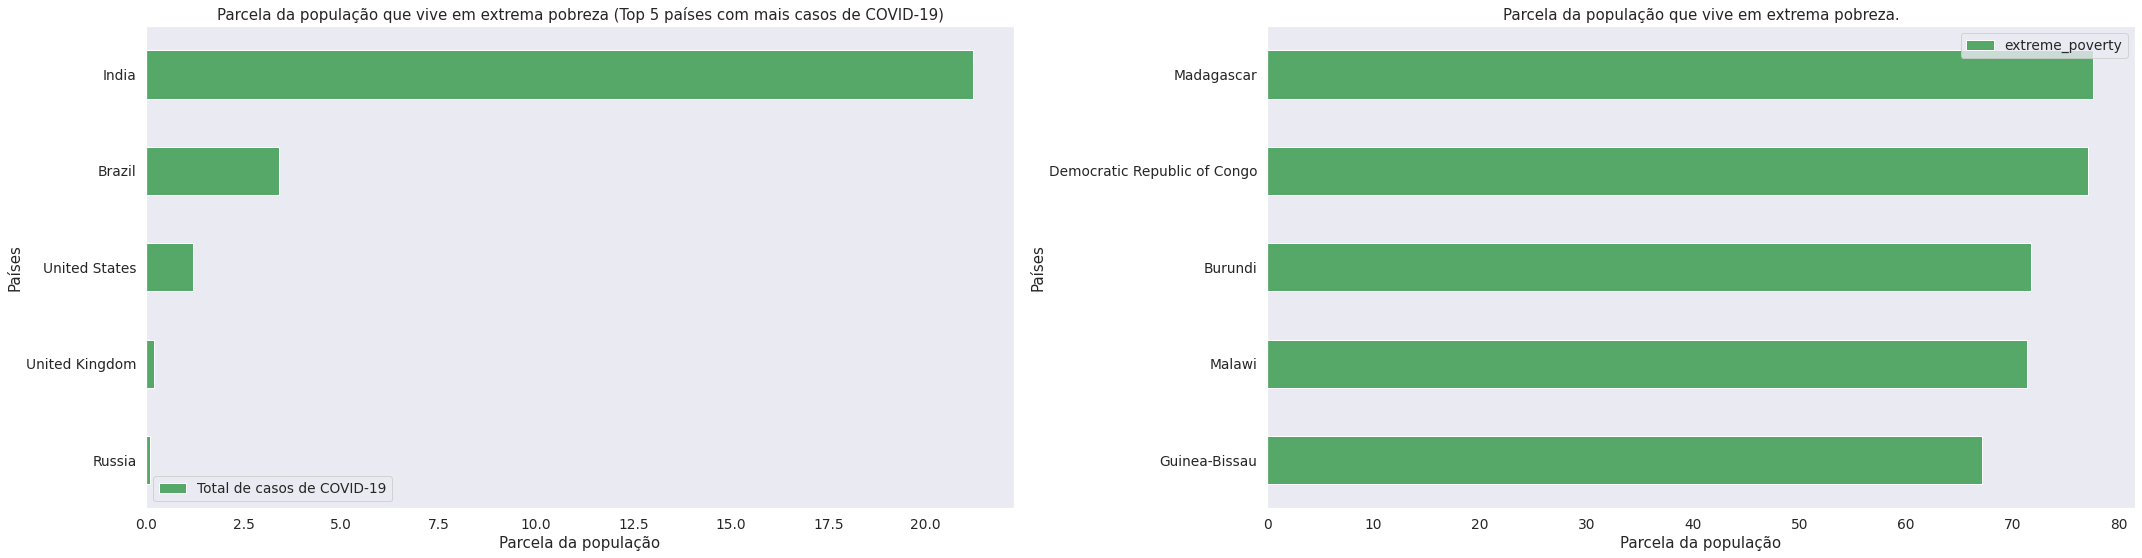

In [360]:
# listando os países com maior quantidade de casos de COVID-19
df_bar1 = df.loc[((df['location'] == 'United States') | (df['location'] == 'India') | (df['location'] == 'Brazil') | (df['location'] == 'United Kingdom') | (df['location'] == 'Russia')) & (df['date'] == '2021-11-30'), ['location', 'extreme_poverty']].sort_values(by = 'extreme_poverty', ascending = True)
df_bar1.sort_values(by = 'extreme_poverty', ascending = True, inplace = True)

# listando os países com maior parcela da população vivendo em extrema pobreza
df_bar2 = df.loc[df['date'] == '2021-11-30', ['location', 'extreme_poverty']].sort_values(by = 'extreme_poverty', ascending = False)[0:5]
df_bar2.sort_values(by = 'extreme_poverty', ascending = True, inplace = True)

# plotando o gráfico
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 8))

df_bar1.plot(x = 'location', y = 'extreme_poverty', kind='barh', ax = ax1, color = 'g', label = 'Total de casos de COVID-19')
ax1.set_xticks(list(df_bar1['extreme_poverty']), minor = True)
ax1.set_title('Parcela da população que vive em extrema pobreza (Top 5 países com mais casos de COVID-19)')
ax1.set_xlabel('Parcela da população')
ax1.set_ylabel('Países')

df_bar2.plot(x = 'location', y = 'extreme_poverty', kind='barh', ax = ax2, color = 'g')
ax2.set_xticks(list(df_bar2['extreme_poverty']), minor = True)
ax2.set_title('Parcela da população que vive em extrema pobreza.')
ax2.set_xlabel('Parcela da população')
ax2.set_ylabel('Países')

plt.tight_layout();

A hipótese dois é falsa. Como demonstrado, os países em, que há uma maior parcela de pessoas vivendo em extrema pobreza não fazem parte dos países com maior quantidade de casos de COVID-19. Mesmo que a India possuam uma maior parcela da população vivendo em extrema pobreza, em relaçao o TOP 5, a maior parte dos países presente nessa lista possuem um índice menor do que os países com mais pobres, onde mais de 60% da população vivem em condições de extrema pobreza

###H3: Os países com maior quantidade de mortos por COVID-19 possuem uma maior expectativa de vida;

Iremos verificar quais os países possuem a maior quantidade de mortes por COVID-19.

In [361]:
# listando os países de acordo com a expectativa de vida
df_exp = df.loc[df['date'] == '2021-11-30', ['location', 'life_expectancy']].sort_values(by = 'life_expectancy', ascending = False).reset_index()

# eliminando a coluna index
df_exp.drop(columns = ['index'], inplace = True)

In [362]:
# listando a expectativa de vida dos países com maior quantidade de mortos por COVID-19
df_exp.loc[((df_exp['location'] == 'United States') | (df_exp['location'] == 'Brazil') | (df_exp['location'] == 'India') | (df_exp['location'] == 'Mexico') | (df_exp['location'] == 'Russia'))]


,location,life_expectancy
56,United States,78.86
95,Brazil,75.88
105,Mexico,75.05
134,Russia,72.58
158,India,69.66


In [363]:
# listando os países com maior expectativa de vida
df_exp[0:5]


,location,life_expectancy
0,Monaco,86.75
1,San Marino,84.97
2,Hong Kong,84.86
3,Japan,84.63
4,Macao,84.24


In [364]:
# média da expectativade vida dos países com maior quantidade de mortos
med_top = df_exp.loc[((df_exp['location'] == 'United States') | (df_exp['location'] == 'Brazil') | (df_exp['location'] == 'India') | (df_exp['location'] == 'Mexico') | (df_exp['location'] == 'Russia'))].mean()

# média da expectativade vida dos países com maior expectativa de vida
med_top_ex = df_exp[0:5].mean()

# média mundial de expectativa de vida
med_ger = df_exp.mean()

print(f'Média da expectativade vida dos países com maior quantidade de mortos: {med_top}')
print(f'Média da expectativade vida dos países com maior expectativa de vida: {med_top_ex}')
print(f'Média mundial de expectativa de vida: {med_ger}')

Média da expectativade vida dos países com maior quantidade de mortos: life_expectancy   74.41
dtype: float64
Média da expectativade vida dos países com maior expectativa de vida: life_expectancy   85.09
dtype: float64
Média mundial de expectativa de vida: life_expectancy   73.52
dtype: float64


A hiótese três é falsa. A maior quantidade de casos de COVID-19 se concentra nos países com maior expectativa de vida, exceto a India que possui uma expectativa de vida de 69 anos, menor que a média mundial.

###H4: Os países com maior quantidade de mortos por COVID-19 possuem uma menor quantidade de leitos disponíveis

In [365]:
# listando a variável hospital_beds_per_thousand por país
df_ap = df.loc[(df['date'] == '2021-11-30'), ['location', 'hospital_beds_per_thousand']].sort_values(by = 'hospital_beds_per_thousand', ascending = False).reset_index()

# eliminando a coluna index
df_ap.drop(columns = ['index'], inplace = True)

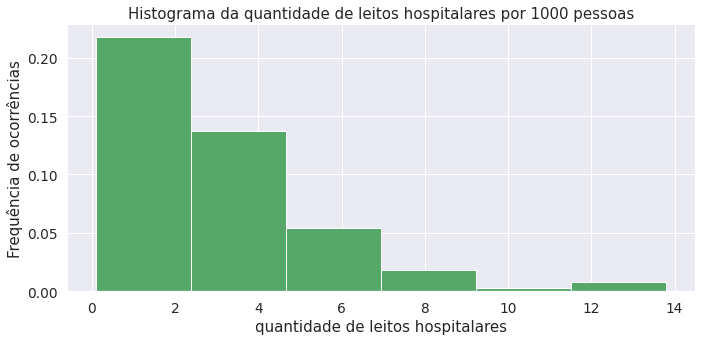

In [366]:
# plotando o histograma
fig, ax = plt.subplots(figsize = (10, 5))

ax.hist(x = 'hospital_beds_per_thousand', data=df_ap, density=True, bins = 6, color = 'g')
ax.set_title("Histograma da quantidade de leitos hospitalares por 1000 pessoas")
ax.set_ylabel("Frequência de ocorrências")
ax.set_xlabel("quantidade de leitos hospitalares")

plt.tight_layout()

In [367]:
# listando a quantidade de leitos dos países com maior quantidade de mortes por COVID-19
df_ap.loc[((df_ap['location'] == 'United States') | (df_ap['location'] == 'Brazil') | (df_ap['location'] == 'India') | (df_ap['location'] == 'Mexico') | (df_ap['location'] == 'Russia'))]

,location,hospital_beds_per_thousand
5,Russia,8.05
71,United States,2.77
91,Brazil,2.20
123,Mexico,1.38
158,India,0.53


A hipótese 4 é verdadeira. De fato, os países com mais mortes são os países que possuem menos leitos hospitalares, exceto a Russia que está entre os países com a maior quantidade de leitos hospitalares. Cerca de 40% dos países possuem menos de sete leitos hospitalares por mil pessoas. 

###H5: Os países com maior quantidade de mortos por COVID-19 são os países que menos vacinam.

In [373]:
# listando a variável hospital_beds_per_thousand por país
df_ap = df.loc[(df['date'] == '2021-11-30'), ['location', 'population','people_vaccinated']].sort_values(by = 'people_vaccinated', ascending = False).reset_index()

# eliminando a coluna index
df_ap.drop(columns = ['index'], inplace = True)

df_ap['%_pessoas_vacinadas'] = df_ap['people_vaccinated'] / df_ap['population']

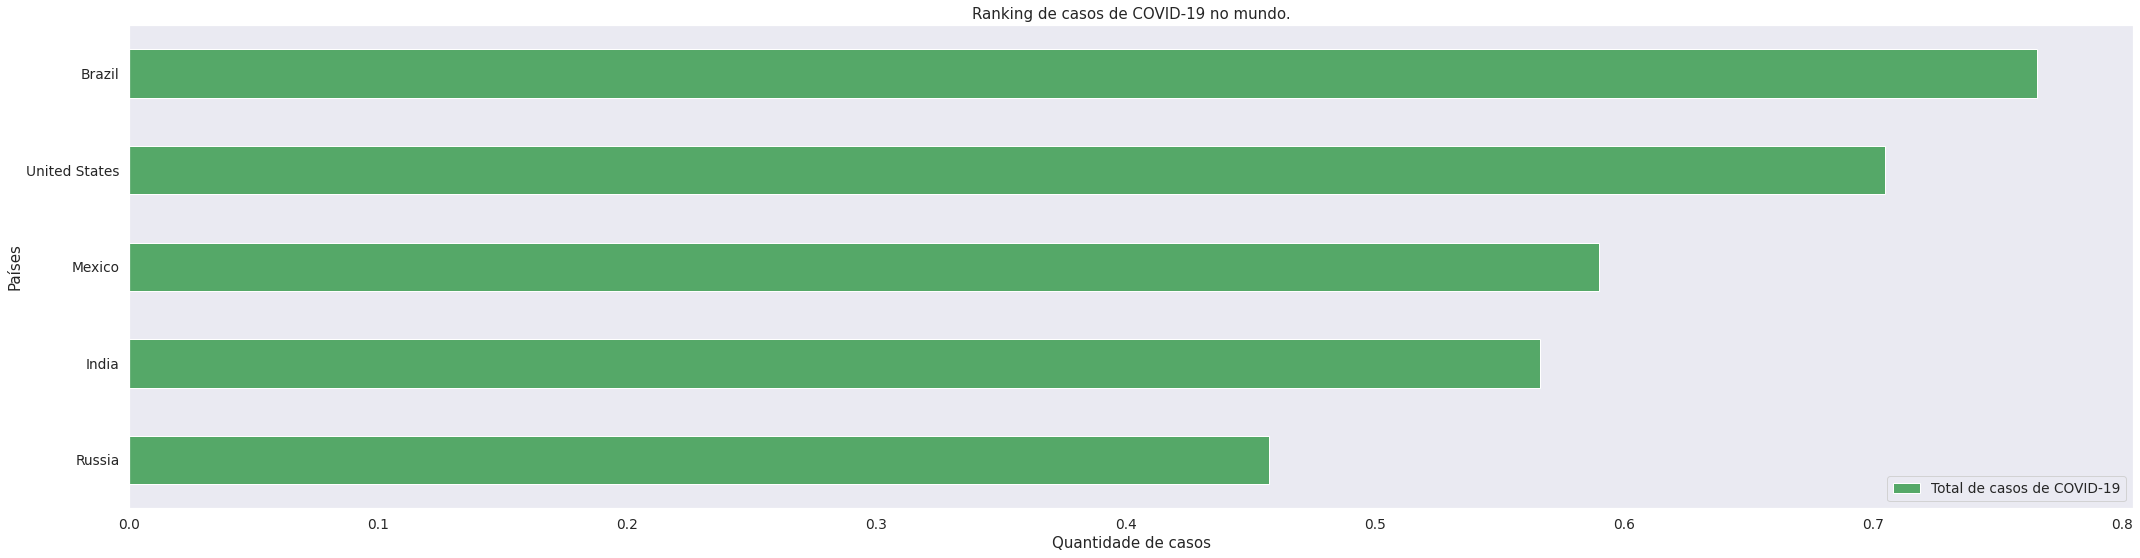

In [383]:
# listando a variável people_vaccinated dos países com maior número de mortes por COVID-19
df_bar = df_ap.loc[((df_ap['location'] == 'United States') | (df_ap['location'] == 'Brazil') | (df_ap['location'] == 'India') | (df_ap['location'] == 'Mexico') | (df_ap['location'] == 'Russia'))]

# plotando o gráfico de barras
fig, ax = plt.subplots(figsize = (30, 8))

df_bar = df_bar.sort_values(by = '%_pessoas_vacinadas', ascending = True)

df_bar.plot(x = 'location', y = '%_pessoas_vacinadas', kind='barh', ax = ax, color = 'g', label = 'Total de casos de COVID-19')
ax.set_xticks(list(df_bar['%_pessoas_vacinadas']), minor = True)
ax.set_title('Ranking de casos de COVID-19 no mundo.')
ax.set_xlabel('Quantidade de casos')
ax.set_ylabel('Países')

plt.tight_layout()

Portanto, conforme evidenciado logo acima, os países com maior quantidade de mortes por COVID-19, também estão entre os países que mais vacinam. A hipótese 5 é verdadeira. Além disso, como podemos verificar, dentre os países com maior número de casos de COVID-19, o Brasil é o país que mais vacina com 77% da população com pelo menos uma dose da vacina.

# Conclusão

In [370]:
tab = [['Hipóteses', 'Conclusão'],
       ['H1', 'Inconclusivo'],
       ['H2', 'Falso'],
       ['H3', 'Falso'],
       ['H4', 'Verdadeiro'],
       ['H5', 'Verdadeiro'],
      ]
print(tabulate(tab, headers='firstrow'))

Hipóteses    Conclusão
-----------  ------------
H1           Inconclusivo
H2           Falso
H3           Falso
H4           Verdadeiro
H5           Verdadeiro
